In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits=pd.read_csv('Mnist.csv')

In [3]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digits=digits.astype(np.uint8)

In [6]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
digits_features=digits.drop('label',axis=1)

In [8]:
labels=digits['label']

### Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

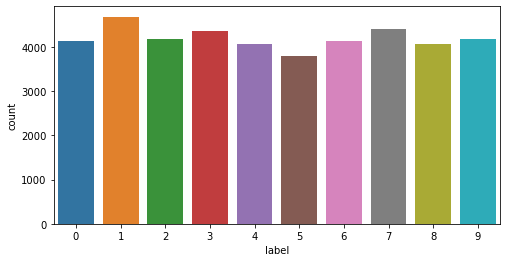

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=digits)

Text(0.5, 1.0, '1')

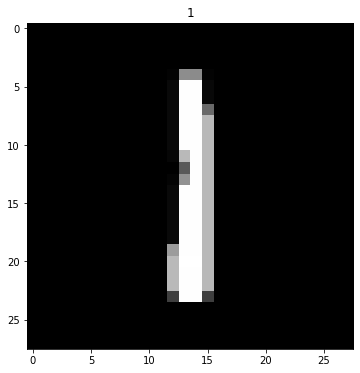

In [10]:
plt.figure(figsize=(6,6))
plt.imshow(digits_features.iloc[2,:].values.reshape(28,28),cmap='gray')
plt.title(labels[2])

In [11]:
import sklearn.neural_network as nn
import sklearn.model_selection as ms
import sklearn.metrics as mt

In [12]:
Norm_digits_features=digits_features/255

In [13]:
#Splitting the dataset
x_train,x_test,y_train,y_test=ms.train_test_split(Norm_digits_features,
                                                  labels,test_size=0.3,
                                                  random_state=2123245)

In [14]:
#Checking the shape of the splitted datasets
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [15]:
ANN=nn.MLPClassifier(solver='adam', alpha=0.01, 
                     hidden_layer_sizes=(30,20,10),max_iter=800)

In [16]:
#fitting the model
%%time
ANN.fit(x_train,y_train)

Wall time: 2min 3s


MLPClassifier(alpha=0.01, hidden_layer_sizes=(30, 20, 10), max_iter=800)

In [17]:
#Checking the test scores
ANN.score(x_test,y_test)

0.953968253968254

<AxesSubplot:>

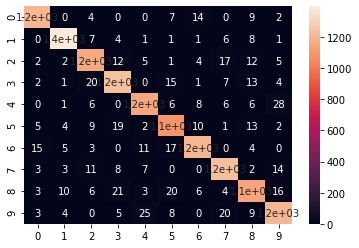

In [18]:
sns.heatmap(mt.confusion_matrix(y_test,ANN.predict(x_test)),annot=True)

In [19]:
print(mt.classification_report(y_test,ANN.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1239
           1       0.98      0.98      0.98      1427
           2       0.95      0.95      0.95      1214
           3       0.95      0.95      0.95      1303
           4       0.96      0.95      0.95      1212
           5       0.94      0.94      0.94      1155
           6       0.96      0.96      0.96      1261
           7       0.95      0.96      0.96      1277
           8       0.94      0.93      0.93      1235
           9       0.94      0.94      0.94      1277

    accuracy                           0.95     12600
   macro avg       0.95      0.95      0.95     12600
weighted avg       0.95      0.95      0.95     12600



In [20]:
result=ANN.predict(x_test)

Text(0.5, 1.0, '9')

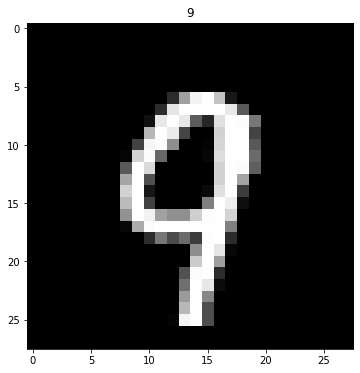

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(x_test.iloc[3,:].values.reshape(28,28),cmap='gray')
plt.title(result[3])

In [22]:
import cv2 as cv

In [52]:
img=plt.imread(r"C:\Users\SARAH\Desktop\SEM II\Machine Learning-KM\test.png")

In [53]:
img.shape

(648, 1152, 3)

In [43]:
img[:,:,2] 

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [54]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # converted to B&W

In [45]:
img_gray.shape

(648, 1152)

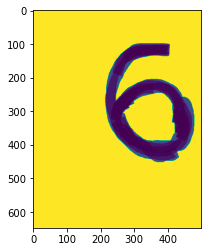

In [55]:
plt.imshow(img_gray[:,200:700])

In [57]:
img_gray=cv.resize(img_gray, dsize=(28,28))

In [58]:
img_gray.shape

(28, 28)

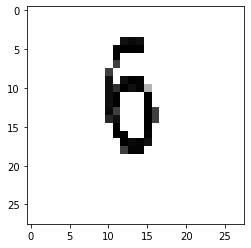

In [59]:
plt.imshow(img_gray,cmap='gray')

In [60]:
ANN.predict(img_gray.reshape(1,-1))

array([5], dtype=uint8)